In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# organ = "liver"
organ = "heart"
# organ = "muscle"
# organ = "kidney"

Load data
===

In [3]:
path= '../data/alignment/'+organ
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)            

data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])       

    data["diff"]= abs(data["old_Rsquared"] - data["new_Rsquared"])    
# data=data[data.NDP >=4]
print(data.shape)

(32477, 39)


In [5]:
data_align=data
data_align.head()

,proteinName,peptideSeq,charge,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,...,Protein,diff,protien,peptide,rsquared,mo,io_e,io_a1a0,io_a2a0,io_a2a1
0,1433B_MOUSE,YDDMAAAMK,2,0.943504,0.982255,11.0,0.06718,0.006383,1.574851e+08,508.21478,...,1433B_MOUSE,0.038752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1433B_MOUSE,DSTLIMQLLR,2,0.991939,0.998637,11.0,0.07171,0.002174,7.236333e+08,595.33411,...,1433B_MOUSE,0.006698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1433B_MOUSE,DSTLImQLLR,2,-0.347515,0.584312,11.0,0.04887,0.012318,1.019383e+07,603.33154,...,1433B_MOUSE,0.931827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1433B_MOUSE,YLILNATQAESK,2,0.933552,0.940155,11.0,0.07775,0.007184,2.833884e+07,675.86682,...,1433B_MOUSE,0.006603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1433B_MOUSE,AVTEQGHELSNEER,2,0.868400,0.930949,11.0,0.08724,0.012955,1.094401e+06,799.87390,...,1433B_MOUSE,0.062549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Rsquared >= 95 \t Original d2ome =",data[data.old_Rsquared>=0.95].shape[0]/data.shape[0])
print("Rsquared >= 90 \t Original d2ome =",data[data.old_Rsquared>=0.9].shape[0]/data.shape[0])
print("Rsquared >= 80 \t Original d2ome =", data[data.old_Rsquared>=0.8].shape[0]/data.shape[0])
print("Rsquared >= 75 \t Original d2ome =",data[data.old_Rsquared>=0.75].shape[0]/data.shape[0])


Rsquared >= 95 	 Original d2ome = 0.20361027020966477
Rsquared >= 90 	 Original d2ome = 0.3534028478528983
Rsquared >= 80 	 Original d2ome = 0.5082968942706582
Rsquared >= 75 	 Original d2ome = 0.5538737526628545


In [5]:
print("Rsquared >= 95 \t Original d2ome =",data[data.old_Rsquared>=0.95].shape[0])
print("Rsquared >= 90 \t Original d2ome =",data[data.old_Rsquared>=0.9].shape[0])
print("Rsquared >= 80 \t Original d2ome =", data[data.old_Rsquared>=0.8].shape[0])
print("Rsquared >= 75 \t Original d2ome =",data[data.old_Rsquared>=0.75].shape[0])
print("Rsquared <= 75 \t Original d2ome =",data[data.old_Rsquared<=0.75].shape[0])

Rsquared >= 95 	 Original d2ome = 3632
Rsquared >= 90 	 Original d2ome = 6304
Rsquared >= 80 	 Original d2ome = 9067
Rsquared >= 75 	 Original d2ome = 9880
Rsquared <= 75 	 Original d2ome = 7958


In [6]:
alignmentdata=[data[data.old_Rsquared>=0.95].shape[0],data[data.old_Rsquared>=0.9].shape[0], data[data.old_Rsquared>=0.8].shape[0],
data[data.old_Rsquared>=0.75].shape[0],data[data.old_Rsquared<=0.75].shape[0]]

In [10]:
path= '../data/no_alignment/'+organ
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)            

data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])       

    data["diff"]= abs(data["old_Rsquared"] - data["new_Rsquared"])    
# data=data[data.NDP >=4]
print(data.shape)

(32477, 39)


In [11]:
data_noalign=data
data_noalign.head()

,proteinName,peptideSeq,charge,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,...,Protein,diff,protien,peptide,rsquared,mo,io_e,io_a1a0,io_a2a0,io_a2a1
0,1433B_MOUSE,YDDMAAAMK,2,0.943504,0.982255,11.0,0.06718,0.006383,1.574851e+08,508.21478,...,1433B_MOUSE,0.038752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1433B_MOUSE,DSTLIMQLLR,2,0.991939,0.998637,11.0,0.07171,0.002174,7.236333e+08,595.33411,...,1433B_MOUSE,0.006698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1433B_MOUSE,DSTLImQLLR,2,-0.526569,0.423336,8.0,0.04887,0.016403,1.019383e+07,603.33154,...,1433B_MOUSE,0.949904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1433B_MOUSE,YLILNATQAESK,2,0.903625,0.914044,9.0,0.07775,0.007442,2.833884e+07,675.86682,...,1433B_MOUSE,0.010419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1433B_MOUSE,AVTEQGHELSNEER,2,0.909315,0.995533,6.0,0.08724,0.016362,1.094401e+06,799.87390,...,1433B_MOUSE,0.086218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("Rsquared >= 95 \t Original d2ome =",data[data.old_Rsquared>=0.95].shape[0])
print("Rsquared >= 90 \t Original d2ome =",data[data.old_Rsquared>=0.9].shape[0])
print("Rsquared >= 80 \t Original d2ome =", data[data.old_Rsquared>=0.8].shape[0])
print("Rsquared >= 75 \t Original d2ome =",data[data.old_Rsquared>=0.75].shape[0])
print("Rsquared <= 75 \t Original d2ome =",data[data.old_Rsquared<=0.75].shape[0])

Rsquared >= 95 	 Original d2ome = 3146
Rsquared >= 90 	 Original d2ome = 5420
Rsquared >= 80 	 Original d2ome = 7778
Rsquared >= 75 	 Original d2ome = 8391
Rsquared <= 75 	 Original d2ome = 5971


In [9]:
no_alignmentdata=[data[data.old_Rsquared>=0.95].shape[0],data[data.old_Rsquared>=0.9].shape[0], data[data.old_Rsquared>=0.8].shape[0],
data[data.old_Rsquared>=0.75].shape[0],data[data.old_Rsquared<=0.75].shape[0]]

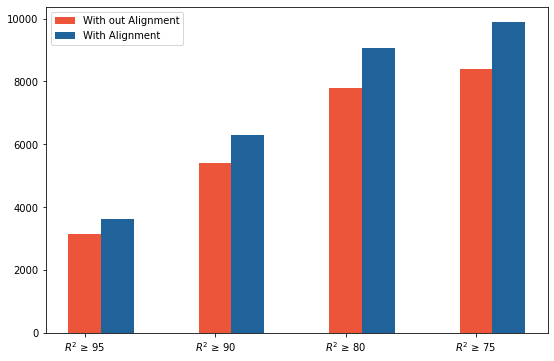

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(9,6))
bar_width = 0.25
index=np.array([0,1,2,3])

# '#3CAEA3','#F6D55C','#ED553B','#20639b'

plt.bar(index,no_alignmentdata[:-1],bar_width, label= "With out Alignment" ,color='#ED553B') #ED553B
# plt.bar(index+bar_width,noAlin,bar_width, label= "With Zero Ionscore",color='#F6D55C')
plt.bar(index+bar_width,alignmentdata[:-1],bar_width, label="With Alignment",color='#20639b')

plt.xticks([0,1,2,3],[r'$R^2$ ≥ 95',r'$R^2$ ≥ 90',r'$R^2$ ≥ 80',r'$R^2$ ≥ 75'])
plt.legend()

plt.savefig(f"{organ}.jpeg",dpi=900, bbox_inches = "tight")

In [107]:
# data_align.columns

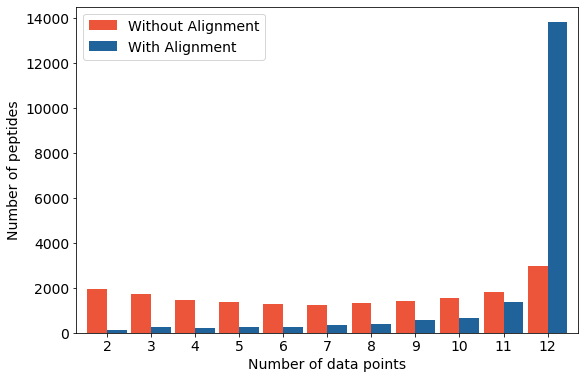

In [93]:
temp_align=data_align.groupby("NDP")["peptideSeq"].count().reset_index()
temp_noalign=data_noalign.groupby("NDP")["peptideSeq"].count()
temp_merge=temp_align.merge(temp_noalign,on="NDP")
temp_merge.NDP=temp_merge.NDP.astype(int)
temp_merge.set_index("NDP")
temp_merge=temp_merge[temp_merge.NDP>=2]
temp_merge=temp_merge[["peptideSeq_x","peptideSeq_y"]]
temp_merge.columns=["With Alignment","Without Alignment"]
# ======================= Plot =======================
plt.rc('font', size=14) 
temp_merge[["Without Alignment","With Alignment"]].plot(kind="bar",width=0.9,rot=0,figsize=(9,6),
                                                        color=["#ED553B","#20639b"])
plt.ylabel("Number of peptides")
plt.xlabel("Number of data points")

plt.savefig(f"NDP_liver_all.jpeg",dpi=900, bbox_inches = "tight")

In [105]:
# temp_align=data_align[data_align.old_Rsquared>=0.75].groupby("NDP")["peptideSeq"].count().reset_index()
# temp_noalign=data_noalign[data_noalign.old_Rsquared>=0.75].groupby("NDP")["peptideSeq"].count()
# temp_merge=temp_align.merge(temp_noalign,on="NDP")
# temp_merge.NDP=temp_merge.NDP.astype(int)
# temp_merge.set_index("NDP")
# temp_merge=temp_merge[temp_merge.NDP>=2]
# temp_merge=temp_merge[["peptideSeq_x","peptideSeq_y"]]
# temp_merge.columns=["With Alignment","Without Alignment"]

# # ====================================================
# # ======================= Plot =======================
# wa=int(temp_merge[["With Alignment"]].sum())
# woa=int(temp_merge[["Without Alignment"]].sum())

# plt.rc('font', size=14) 
# g=temp_merge[["Without Alignment","With Alignment"]].plot(kind="bar",width=0.9,rot=0,figsize=(9,6),
#                                                         color=["#ED553B","#20639b"])
# plt.ylabel("Number of peptides")
# plt.xlabel("Number of data points")
# plt.title(f"Without Alignment = {woa}, With Alignment = {wa}")
# g.set_xticklabels(range(2,13))
# # plt.savefig(f"NDP_liver.jpeg",dpi=900, bbox_inches = "tight")

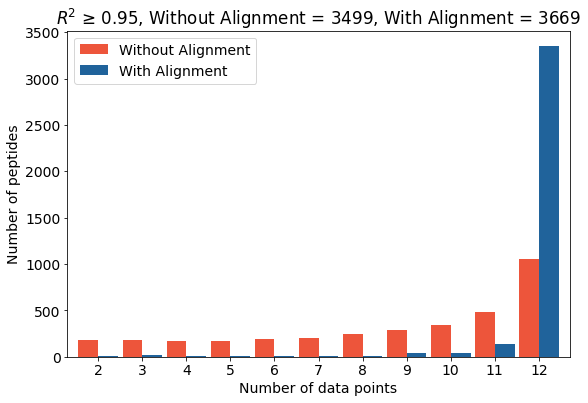

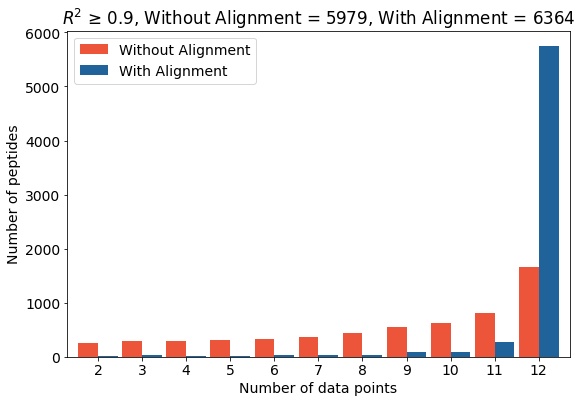

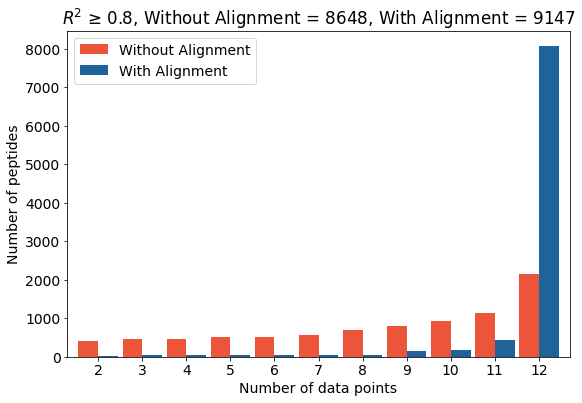

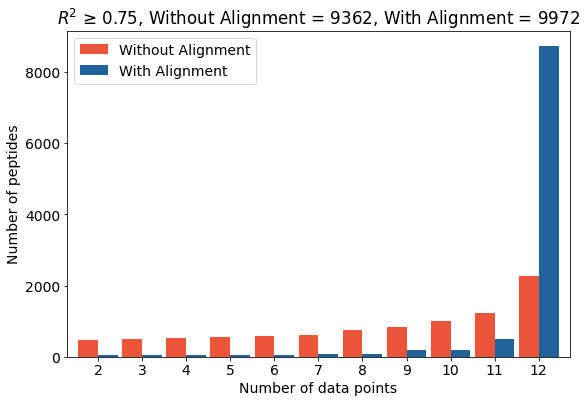

In [104]:
rsq=[0.95,0.9,0.8,0.75]

for r in rsq:
    temp_align=data_align[data_align.old_Rsquared>=r].groupby("NDP")["peptideSeq"].count().reset_index()
    temp_noalign=data_noalign[data_noalign.old_Rsquared>=r].groupby("NDP")["peptideSeq"].count()
    temp_merge=temp_align.merge(temp_noalign,on="NDP")
    temp_merge.NDP=temp_merge.NDP.astype(int)
    temp_merge.set_index("NDP")
    temp_merge=temp_merge[temp_merge.NDP>=2]
    temp_merge=temp_merge[["peptideSeq_x","peptideSeq_y"]]
    temp_merge.columns=["With Alignment","Without Alignment"]

    # ====================================================
    # ======================= Plot =======================
    wa=int(temp_merge[["With Alignment"]].sum())
    woa=int(temp_merge[["Without Alignment"]].sum())
    
    plt.rc('font', size=14) 
    g=temp_merge[["Without Alignment","With Alignment"]].plot(kind="bar",width=0.9,rot=0,figsize=(9,6),
                                                            color=["#ED553B","#20639b"])
    plt.ylabel("Number of peptides")
    plt.xlabel("Number of data points")
    plt.title("$R{^2}$"+f" ≥ {r}, Without Alignment = {woa}, With Alignment = {wa}")
    g.set_xticklabels(range(2,13))

    plt.savefig(f"NDP_liver_{r}.jpeg",dpi=900, bbox_inches = "tight")

In [86]:
# print(temp_merge[["With Alignment"]].sum())
# print(temp_merge[["Without Alignment"]].sum())

In [108]:
data_align.shape

(32477, 39)

In [109]:
data_noalign.shape

(32477, 39)

In [117]:
data_align[data_align.NDP>=4].sigma_old.describe()

count    17822.000000
mean         0.041257
std          0.201215
min          0.000158
25%          0.002903
50%          0.005715
75%          0.012713
max          5.641889
Name: sigma_old, dtype: float64

In [118]:
data_noalign[data_noalign.NDP>=4].sigma_old.describe()

count    14350.000000
mean         0.263984
std         19.278759
min          0.000206
25%          0.003061
50%          0.006307
75%          0.015633
max       1824.350759
Name: sigma_old, dtype: float64

In [138]:
# import seaborn as sns
# sns.distplot(data_noalign[(data_noalign.NDP>=4) & (data_noalign.sigma_old < 1)].sigma_old.astype(float) , 
#               hist=False, kde=True, bins=5000, 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

# sns.distplot(data_align[(data_align.NDP>=4) & (data_align.sigma_old < 1)].sigma_old.astype(float) , 
#               hist=False, kde=True, bins=5000, 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

In [142]:
# data_noalign[data_noalign.sigma_old<0]
np.std(data_noalign[data_noalign.NDP>=4].sigma_old)

19.278087658782447